##### MARK MWIRIGI
##### 19/02529
##### BACHELOR IN SOFTWARE DEVELOPMENT
##### MACHINE LEARNING - BSD 3204
##### ASSIGNMENT 1

**INSTRUCTIONS**
1.	Carry out the assignment within the given time limit
2.	Upload your report, notebook & CSV or excel file of your preprocessed dataset
3.	Include screenshots in your report and explanation for each step
4.	You may perform any other activity necessary for this activity that is not stated in the below list.

**Activity**
<ol>
<li>Download the attached CSV file</li>
<li>Import the file into python DataFrame</li>
<li>Preprocess the dataset by</li>
<ul>
<li>Insert columns heads ie [Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	Outcome]</li>
<li>Computing mean, standard deviation of each feature</li>
<li>Standardize the input features ie do not standardize the output feature(outcome) using standardScaler</li>
<li>Save the processed set to CSV or Excel to be submitted</li>
<li>Split the data into test set and training set</li>
</ul>
<li>Create a logistic model</li>
<ul>
<li>Fit the model using the processed data set</li>
<li>Compute the score and comment on the results</li>
<li>Visualize the confusion matrix using matplotlib</li>
</ul>
<li>Suggest ways of improving the model accuracy, sensitivity and precision.</li>
</ol>


### Dataset Attributes
**Pregnancies**
Number of times pregnant

**Glucose**
Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure**
Diastolic blood pressure (mm Hg)

**SkinThickness**
Triceps skin fold thickness (mm)

**Insulin**
2-Hour serum insulin (mu U/ml)

**BMI**
Body mass index (weight in kg/(height in m)<sup>2</sup>)

**DiabetesPedigreeFunction**
Diabetes pedigree function

**Age**
Age (years)

**Outcome**
Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("pimadataset.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction",
              "Age", "Outcome"]

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [7]:
df.std()

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

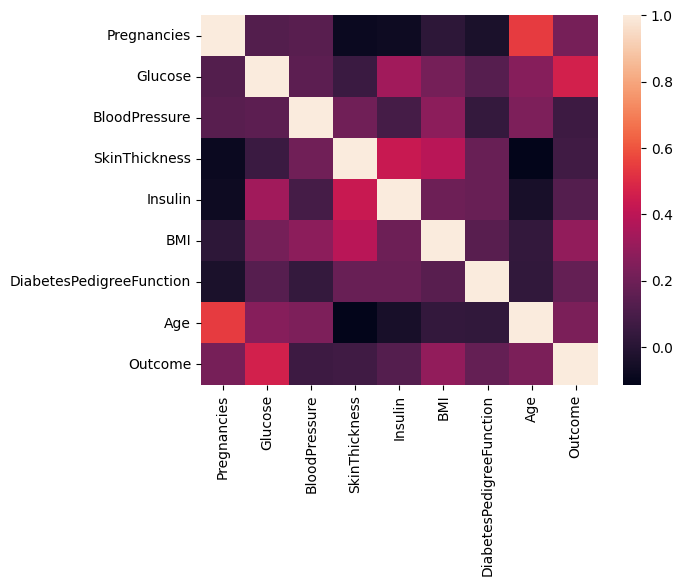

In [11]:
sns.heatmap(df.corr())

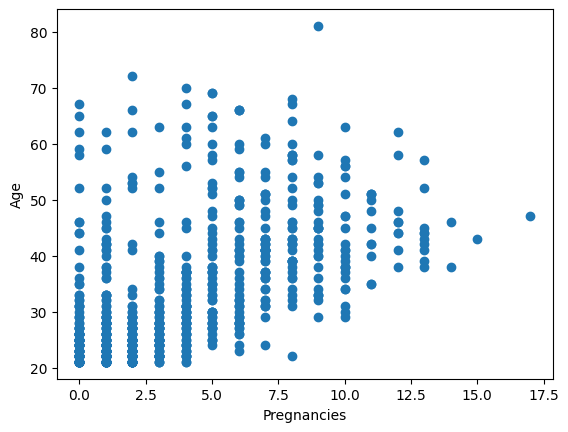

In [12]:
plt.xlabel("Pregnancies")
plt.ylabel("Age")
plt.scatter(df.Pregnancies, df.Age)

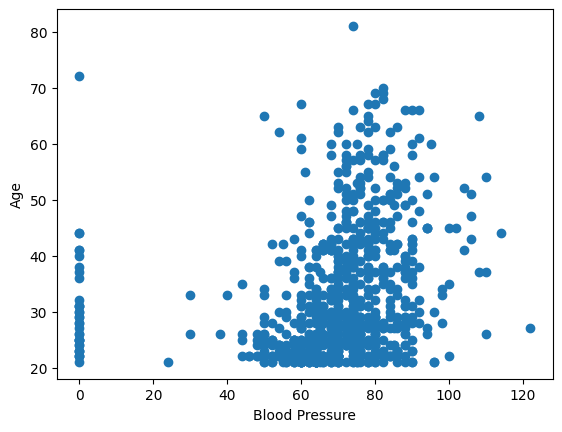

In [13]:
plt.xlabel("Blood Pressure")
plt.ylabel("Age")
plt.scatter(df.BloodPressure, df.Age)

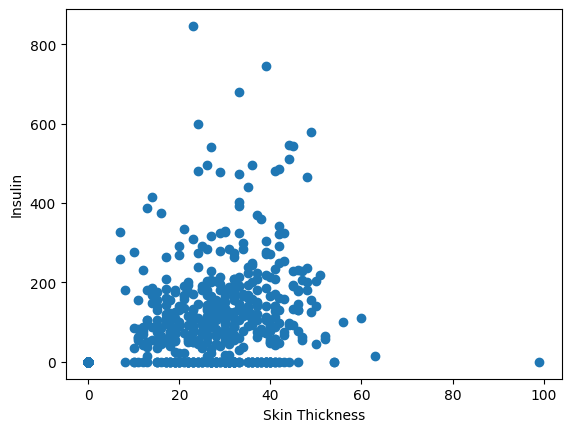

In [14]:
plt.xlabel("Skin Thickness")
plt.ylabel("Insulin")
plt.scatter(df.SkinThickness, df.Insulin)

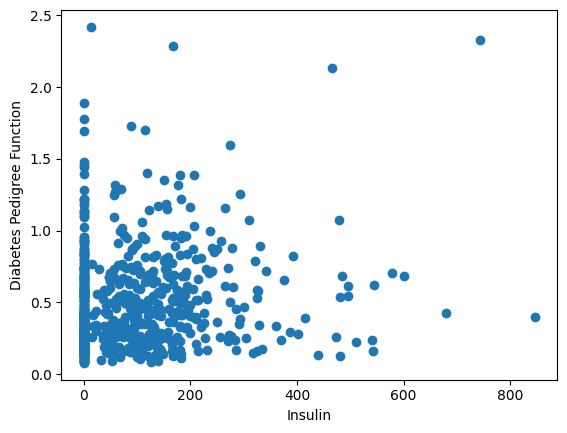

In [15]:
plt.xlabel("Insulin")
plt.ylabel("Diabetes Pedigree Function")
plt.scatter(df.Insulin, df.DiabetesPedigreeFunction)

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


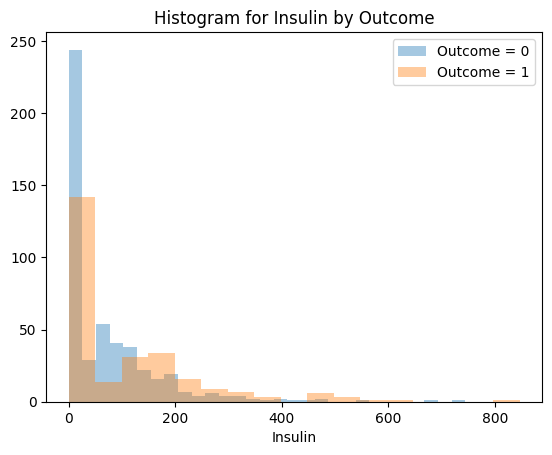

In [16]:
sns.distplot(df.loc[df.Outcome == 0].Insulin, kde=False, label="Outcome = 0")
sns.distplot(df.loc[df.Outcome == 1].Insulin, kde=False, label="Outcome = 1")
plt.title("Histogram for Insulin by Outcome")
plt.legend()

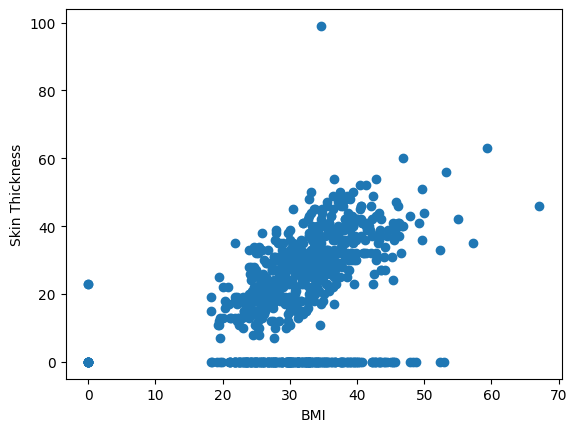

In [17]:
plt.xlabel("BMI")
plt.ylabel("Skin Thickness")
plt.scatter(df.BMI, df.SkinThickness)

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

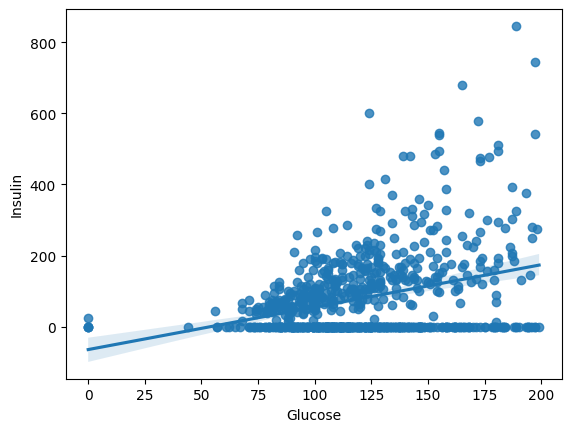

In [18]:
sns.regplot(x="Glucose", y="Insulin", data=df)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

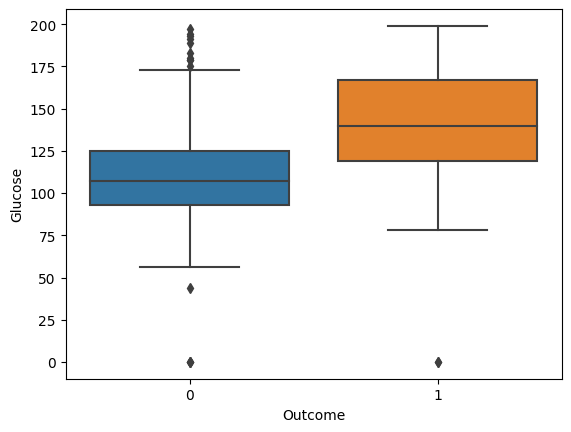

In [19]:
sns.boxplot(x=df.Outcome, y=df.Glucose)

In [20]:
df = df[(df.Pregnancies < 15) & (df.Insulin < 600) & (df.Age <= 70) & (df.Glucose > 50) & (df.BMI > 15) & (
        df.SkinThickness <= 60) & (df.BloodPressure >= 40) & (df.DiabetesPedigreeFunction < 2)]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
scaler

StandardScaler()

In [23]:
features = df[[i for i in df.columns if i != "Outcome"]].copy()
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [24]:
transformed_features = scaler.fit_transform(features)
transformed_features

array([[ 0.64784287,  0.87572302, -0.05605277, ...,  0.18554907,
         0.53209653,  1.44688022],
       [-0.86393285, -1.20540808, -0.55628839, ..., -0.85458349,
        -0.37118574, -0.19186969],
       [ 1.25255316,  2.03190696, -0.7230336 , ..., -1.3449317 ,
         0.67937082, -0.1056197 ],
       ...,
       [ 0.34548773, -0.01619031, -0.05605277, ..., -0.91401964,
        -0.7180985 , -0.27811969],
       [-0.86393285,  0.14897883, -1.05652402, ..., -0.33451721,
        -0.37773127,  1.18813024],
       [-0.86393285, -0.94113746, -0.22279798, ..., -0.2899401 ,
        -0.48900517, -0.88186966]])

In [25]:
type(transformed_features)

numpy.ndarray

In [26]:
transformed_features_df = pd.DataFrame(transformed_features)
transformed_features_df

,0,1,2,3,4,5,6,7
0,0.647843,0.875723,-0.056053,0.902456,-0.754429,0.185549,0.532097,1.44688
1,-0.863933,-1.205408,-0.556288,0.512939,-0.754429,-0.854583,-0.371186,-0.19187
2,1.252553,2.031907,-0.723034,-1.369731,-0.754429,-1.344932,0.679371,-0.10562
3,-0.863933,-1.073273,-0.556288,0.123421,0.125716,-0.631698,-0.973374,-1.05437
4,0.345488,-0.181359,0.110692,-1.369731,-0.754429,-1.003174,-0.862100,-0.27812
...,...,...,...,...,...,...,...,...
703,1.857263,-0.676867,0.277438,1.746412,0.930955,0.081536,-0.960283,2.56813
704,-0.561578,0.016844,-0.222798,0.383099,-0.754429,0.661038,-0.407186,-0.53687
705,0.345488,-0.016190,-0.056053,0.123421,0.294255,-0.914020,-0.718099,-0.27812
706,-0.863933,0.148979,-1.056524,-1.369731,-0.754429,-0.334517,-0.377731,1.18813


In [27]:
transformed_features_df.to_csv("processed_pimadataset.csv")

In [28]:
y = df.Outcome.copy()
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 708, dtype: int64

In [29]:
type(y)

pandas.core.series.Series

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(transformed_features_df, y, test_size=.2, random_state=42)
display(x_train)
display(x_test)
display(y_train)
display(y_test)

,0,1,2,3,4,5,6,7
522,-1.166288,-0.016190,-0.556288,0.577858,0.790507,0.289562,-0.855555,-0.01937
24,0.345488,-0.412596,0.194065,0.318180,-0.754429,0.542166,0.267003,2.30938
480,-0.259223,-1.139340,-1.056524,-0.201178,-0.754429,-1.567817,-0.066819,-1.05437
314,0.345488,0.016844,1.111164,-1.369731,-0.754429,0.348998,-0.570824,-0.01937
239,0.043133,-0.875070,-0.222798,0.707697,-0.754429,-0.037336,0.483005,-0.79562
...,...,...,...,...,...,...,...,...
71,-1.166288,-0.676867,-0.639661,0.448019,-0.754429,-1.151764,-0.744281,-0.96812
106,0.043133,-0.742934,0.277438,-0.395936,-0.276903,-1.359791,-0.790099,-1.05437
270,0.647843,0.974824,-0.889779,0.642778,0.369160,0.467871,0.744826,-0.45062
435,-0.561578,-0.544732,0.610928,1.551653,1.033951,0.200408,0.807009,-0.36437


,0,1,2,3,4,5,6,7
120,-0.561578,-0.842036,-0.389543,-0.525776,-0.295630,-1.671831,0.597552,-0.62312
247,-0.259223,0.016844,0.444183,-1.369731,-0.754429,-1.389509,-0.688644,0.58438
324,1.554908,1.437298,1.277909,-1.369731,-0.754429,-0.289940,-0.531551,1.36063
204,-0.863933,-0.709901,-0.556288,-0.395936,-0.230087,-1.300355,0.659734,-0.62312
603,-0.259223,-1.370577,0.777673,0.642778,-0.099002,0.274703,2.708483,-0.53687
...,...,...,...,...,...,...,...,...
41,-0.561578,-1.667882,-0.222798,0.383099,-0.754429,-0.646557,0.397913,-0.96812
108,0.647843,-0.346529,-0.723034,1.162135,-0.754429,0.274703,-0.669007,-0.79562
582,-0.561578,-0.908104,0.277438,-0.201178,-0.136455,-0.111632,0.604097,-0.88187
56,0.345488,-0.742934,0.110692,0.383099,-0.754429,-0.497967,-0.855555,-0.10562


569    1
30     0
525    0
343    0
262    0
      ..
83     0
119    0
295    0
476    1
115    1
Name: Outcome, Length: 566, dtype: int64

134    0
272    0
355    1
224    0
659    1
      ..
47     0
121    0
637    0
65     0
473    0
Name: Outcome, Length: 142, dtype: int64

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression()
model

LogisticRegression()

In [34]:
model.fit(x_train, y_train)

LogisticRegression()

In [35]:
print("The coefficient is %s\nThe intercept is %.10f\nThe coefficient of determination is %.10f" % (
    model.coef_, model.intercept_, model.score(transformed_features_df, y)))

The coefficient is [[ 0.32781022  1.0192542  -0.11750485 -0.0024737  -0.0875982   0.60498239
   0.31780255  0.17660072]]
The intercept is -0.9212476279
The coefficient of determination is 0.7838983051


In [36]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [37]:
model.predict_proba(x_test)

array([[0.94386294, 0.05613706],
       [0.87303381, 0.12696619],
       [0.29552382, 0.70447618],
       [0.92612204, 0.07387796],
       [0.82568454, 0.17431546],
       [0.86735194, 0.13264806],
       [0.74223136, 0.25776864],
       [0.70413661, 0.29586339],
       [0.8496418 , 0.1503582 ],
       [0.76647677, 0.23352323],
       [0.91718004, 0.08281996],
       [0.66243712, 0.33756288],
       [0.74027319, 0.25972681],
       [0.85995407, 0.14004593],
       [0.80972586, 0.19027414],
       [0.0463984 , 0.9536016 ],
       [0.97513774, 0.02486226],
       [0.91848719, 0.08151281],
       [0.98289118, 0.01710882],
       [0.13391339, 0.86608661],
       [0.84940124, 0.15059876],
       [0.72265936, 0.27734064],
       [0.78382149, 0.21617851],
       [0.81404279, 0.18595721],
       [0.21640855, 0.78359145],
       [0.86205618, 0.13794382],
       [0.137526  , 0.862474  ],
       [0.96908315, 0.03091685],
       [0.89222583, 0.10777417],
       [0.88474857, 0.11525143],
       [0.

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_test, y_pred)

array([[88,  5],
       [20, 29]], dtype=int64)

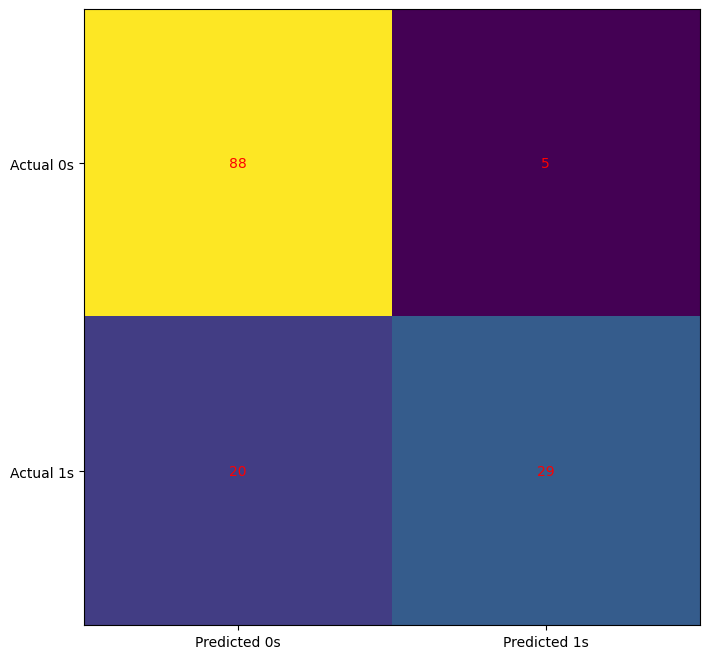

In [40]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()